In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from tensorflow. keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
import cv2

In [10]:
train_directory = "D:\Eye_dataset\Eye dataset"
size=94
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    validation_split = 0.1,
).flow_from_directory(train_directory, batch_size = 16, target_size =
                      (size, size), subset = "training", shuffle = True)

Found 12927 images belonging to 4 classes.


In [11]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_directory,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)

Found 1433 images belonging to 4 classes.


In [12]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1  
).flow_from_directory(train_directory,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)


Found 1433 images belonging to 4 classes.


In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint


In [14]:
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [15]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [16]:
model=Sequential([
                  Conv2D(32,3,activation='relu',kernel_initializer='he_normal',input_shape=(size,size,3)),
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Flatten(),
                  Dense(64,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  Dense(4,activation='softmax',kernel_initializer='glorot_normal')
                  
])
          

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 128)      5

In [18]:

model.compile(optimizer=optimizer_adam,
              loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x = train_generator,
                    validation_data = valid_generator,
                    epochs = 2)

Epoch 1/2
808/808 [==============================] - 295s 364ms/step - loss: 0.2934 - accuracy: 0.9001 - val_loss: 0.3510 - val_accuracy: 0.8709
Epoch 2/2
808/808 [==============================] - 244s 303ms/step - loss: 0.1478 - accuracy: 0.9534 - val_loss: 0.2232 - val_accuracy: 0.9309


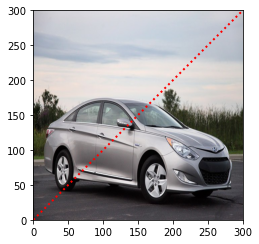

In [8]:

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("C:\\Users\\vijay\\Desktop\\data\\cars_train\\cars_train\\00026.jpg") 
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
x = np.array(range(300))
ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plt.show()

In [6]:
import cv2
cfg_model= "C:\\Users\\vijay\\Desktop\\cv2\\Object-Detection-main\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
f_model = "C:\\Users\\vijay\\Desktop\\cv2\\Object-Detection-main\\frozen_inference_graph.pb"

In [7]:
model = cv2.dnn_DetectionModel(f_model,cfg_model)

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0000022457EF0230>

In [9]:
classlabels = ['person',
'bicycle',
'car',
'motorbike',
'aeroplane',
'bus',
'train',
'car',
'traffic light',
'fire hydrant',
'stop sign',
'parking meter',
'bench',
'bird',
'cat',
'dog',
'horse',
'sheep',
'cow',
'elephant',
'bear',
'zebra',
'giraffe',
'backpack',
'gun']

In [10]:
print(len(classlabels))

25


In [11]:
choice = 0

In [12]:
choice = int(input("Enter 0 to classify pre captured video and 1 to classify in webcam"))

Enter 0 to classify pre captured video and 1 to classify in webcam 0


In [13]:
import cv2
import numpy as np

frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("C:\\Users\\vijay\\Downloads\\haarcascade_russian_plate_number.xml")
minArea = 500
if choice == 0:
    cap = cv2.VideoCapture("C:\\Users\\vijay\\Downloads\\WhatsApp Video 2022-10-22 at 12.07.16 PM.mp4")
    cap.set(3,frameWidth)
    cap.set(4,franeHeight)
    cap.set(10,150)
    count = 0
    font_scale= 3
font=cv2.FONT_HERSHEY_PLAIN
if choice == 1:
    cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,franeHeight)
cap.set(10,150)
count = 0
font_scale= 3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    success , img  = cap.read()

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    numberPlates = plateCascade .detectMultiScale(imgGray, 1.1, 4)
    
   
    ci,co,bb=model.detect(img,confThreshold=0.55)
    print(ci)
    if(len(ci)!=0):
        for classi,conf,box in zip(ci.flatten(),co.flatten(),bb):
            if (classi<= 24):
                cv2.rectangle(img,box,(255,0,0),2)
                cv2.putText(img,classlabels[classi-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    
        if cv2.waitKey(2) & 0xFF ==ord('q'):
            break
    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img,"NumberPlate",(x,y-5),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            imgRoi = img[y:y+h,x:x+w]
            
    cv2.imshow("Result",img)
    if cv2.waitKey(1) & 0xFF ==ord('s'):
        cv2.imwrite("D:\SACHIN\cascade\IMAGES"+str(count)+".jpg",imgRoi)
        cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
        cv2.putText(img,"Scan Saved",(15,265),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        cv2.imshow("Result",img)
        cv2.waitKey(500)
        count+=1

()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
